# Beta Particles in a Magnetic Field
This notebook contains lab data analysis from an experiment to find the kinetic energy of emitted beta particles from a radioactive source. Using a magnetic field the particles' path is curved and can be funnelled into a detector allowing us to calculate their kinetic energy. This was done during my 2nd year of university.

In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def straightline(m,x,c):
    """Returns the y value for a straight line with inputs:
    x coordinate (x)
    gradient (m)
    y-intercept (c)"""
    y = m*x+c
    return y

In [3]:
def kinetic_energy(m,r,c,q,B):
    """Calculates kinetic energy using the equation provided in the lab guide. Return the energy in electron volts"""
    Q = np.sqrt((q*B*r*c)**2 + m**2*c**4) - m*c**2
    return Q/1.6e-19

In [4]:
datafile = 'Calibration Data.csv'
data = np.genfromtxt(datafile,skip_header=1, delimiter=',', unpack=True)
data

array([[-2.000e+00, -1.900e+00, -1.800e+00, -1.700e+00, -1.600e+00,
        -1.500e+00, -1.400e+00, -1.300e+00, -1.200e+00, -1.100e+00,
        -1.000e+00, -9.000e-01, -8.000e-01, -7.000e-01, -6.000e-01,
        -5.000e-01, -4.000e-01, -3.000e-01, -2.000e-01, -1.000e-01,
         0.000e+00,  1.000e-01,  2.000e-01,  3.000e-01,  4.000e-01,
         5.000e-01,  6.000e-01,  7.000e-01,  8.000e-01,  9.000e-01,
         1.000e+00,  1.100e+00,  1.200e+00,  1.300e+00,  1.400e+00,
         1.500e+00,  1.600e+00,  1.700e+00,  1.800e+00,  1.900e+00,
         2.000e+00],
       [-2.002e+02, -1.923e+02, -1.843e+02, -1.756e+02, -1.665e+02,
        -1.573e+02, -1.477e+02, -1.381e+02, -1.281e+02, -1.178e+02,
        -1.075e+02, -9.700e+01, -8.650e+01, -7.600e+01, -6.580e+01,
        -5.530e+01, -4.470e+01, -3.470e+01, -2.527e+01, -1.665e+01,
        -9.520e+00,  1.117e+01,  2.015e+01,  2.973e+01,  3.980e+01,
         5.070e+01,  6.210e+01,  7.310e+01,  8.430e+01,  9.550e+01,
         1.067e+02,  1.178e

In [5]:
# Data for calibration
current = data[0]
m_field = data[1]/1000
amp_err = data[2]
mf_err = data[3]
# Data from experiment
amp_data_temp = data[4]
na22_count_temp = data[5]
na22_cerr_temp = data[6]
sr90_count_temp = data[7]
sr90_cerr_temp = data[8]
magfield_err_temp = data[9]

In [6]:
# Removing nans from data
amp_data = amp_data_temp[0:9]
na22_count = na22_count_temp[0:9]
na22_counterr = na22_cerr_temp[0:9]
sr90_count = sr90_count_temp[0:9]
sr90_counterr = sr90_cerr_temp[0:9]
magfield_err = magfield_err_temp[0:9]

## Data for calibration

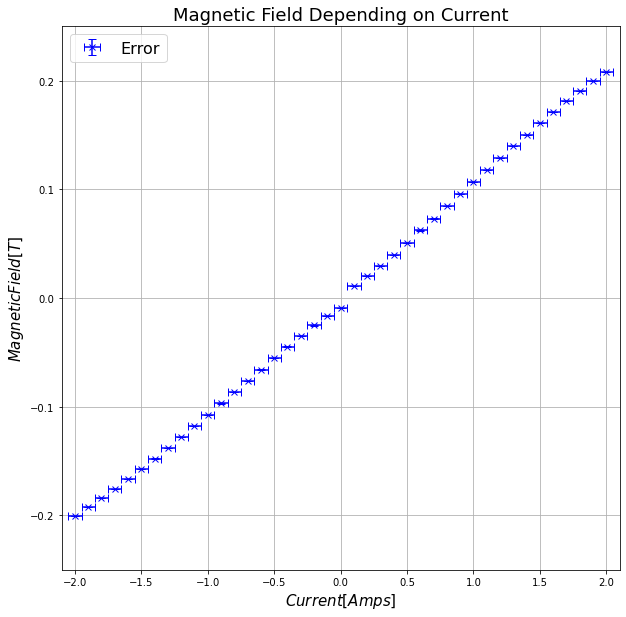

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.grid(visible=True)
ax.set_xlabel('$Current [Amps]$', fontsize=15)
ax.set_ylabel('$Magnetic Field [T]$', fontsize=15)
ax.set_xlim(-2.1,2.1)
ax.set_ylim(-0.25, 0.25)
ax.set_title('Magnetic Field Depending on Current', fontsize = 18)
#ax.scatter(current, m_field, color='red', marker='o', label='Calibration', zorder=5)
# Set error bars
ax.errorbar(current, m_field, yerr=mf_err, xerr=amp_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')
ax.legend(loc='upper left', fontsize=16)

In [8]:
initial_guess = (1,1)
xvals = np.linspace(-2,2,101)
# Curve fit done using the error on the current as it is the biggest error that will effect the measurement
bestfit, cov = curve_fit(straightline, current, m_field, initial_guess, sigma=amp_err, absolute_sigma=True)
bestfit, cov

(array([ 0.10500566, -0.00015829]),
 array([[ 4.35540073e-05, -1.53896926e-14],
        [-1.53896926e-14,  6.09757307e-05]]))

In [9]:
gradient = bestfit[0]
yint = bestfit[1]
grad_err = (cov[0,0])**0.5
yint_err = (cov[1,1])**0.5

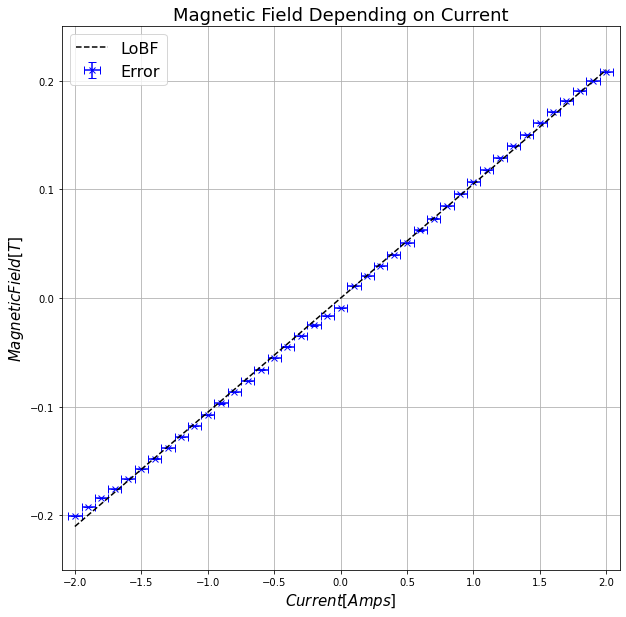

In [10]:
ax.plot(xvals, straightline(bestfit[0],xvals,bestfit[1]), linestyle='--', color='black', zorder=6, label='LoBF')
ax.legend(loc='upper left', fontsize=16)
fig

In [11]:
fig.savefig('MFvAmp.png', dpi=300)

## Experiment Analysis

Error on the mean is given by:

$$\sigma_{\bar{x}} = {\sigma_{x}\over \sqrt{N}}$$

* $\sigma_{x}$ = Standard error
* $N$ = Number of data points

This is calculated and recorded in the lab book, values of these errors are in the data spreadsheet

In [12]:
# This code was used to find the error on the mean for all the counts measured.
sth = np.array([28,44,36])
sth.std(ddof=1)/3

2.6666666666666665

In [13]:
# Convert count data into count rate
na22_crate = na22_count/100
sr90_crate = sr90_count/100
na22_cerr = na22_counterr/100
sr90_cerr = sr90_counterr/100

In [14]:
# Converting the currents to magnetic fields
mag_fields = straightline(gradient, amp_data, yint)
mag_fields

array([-2.10169616e-01, -1.57666785e-01, -1.05163954e-01, -5.26611230e-02,
       -1.58291872e-04,  5.23445393e-02,  1.04847370e-01,  1.57350202e-01,
        2.09853033e-01])

In [15]:
# Finding the uncertainties on the magnetic field data
magf_err = grad_err + yint_err
# This value is added to the data spreadsheet for convinience

In [16]:
# Converting magnetic fields to kinetic energies
Q_energy = kinetic_energy(9.11e-31, 50e-3, 3e8, 1.6e-19, mag_fields)
Q_energy

array([2.68148288e+06, 1.90744382e+06, 1.14616736e+06, 4.29136084e+05,
       5.50080839e+00, 4.25155759e+05, 1.14165158e+06, 1.90280297e+06,
       2.67679574e+06])

To find the error on the energy found, the error propagation equation,
$$ \Delta Q = \sqrt{\left(\frac{\partial Q}{\partial B}\right)^2 (\Delta B)^2} $$
is used.

Where: 
$$ \frac{\partial Q}{\partial B} = \frac{2Bq^2 r^2 c^2}{\sqrt{(qBrc)^2 + m_{0}^2 c^4}} $$

In [17]:
def energy_err(B,q,r,c,m,b):
    """Uncertainty in kinetic energy using the error propagation formula and the equation given in the beta pdf."""
    partial = (2*B*(q**2)*(r**2)*(c**2))/(np.sqrt((q*B*r*c)**2 + (m**2)*(c**4)))
    unc_ke = np.sqrt((partial**2)*(b)**2)
    return unc_ke

In [18]:
ke_err = energy_err(mag_fields,1.6e-19,50e-3,3e8,9.11e-31,magf_err)
ke_err

array([6.82636225e-14, 6.75911182e-14, 6.57760000e-14, 5.80202153e-14,
       3.20447240e-16, 5.79162442e-14, 6.57570215e-14, 6.75850146e-14,
       6.82609697e-14])

In [19]:
(2*(-2.1e-1)*((-1.6e-19)**2)*((50e-3)**2)*((3e8)**2))/(np.sqrt(((-1.6e-19)*(-2.1e-1)*(50e-3)*(3e8))**2 + ((9.11e-31)**2)*((3e8)**4)))

-4.737719112934013e-12

<ErrorbarContainer object of 3 artists>

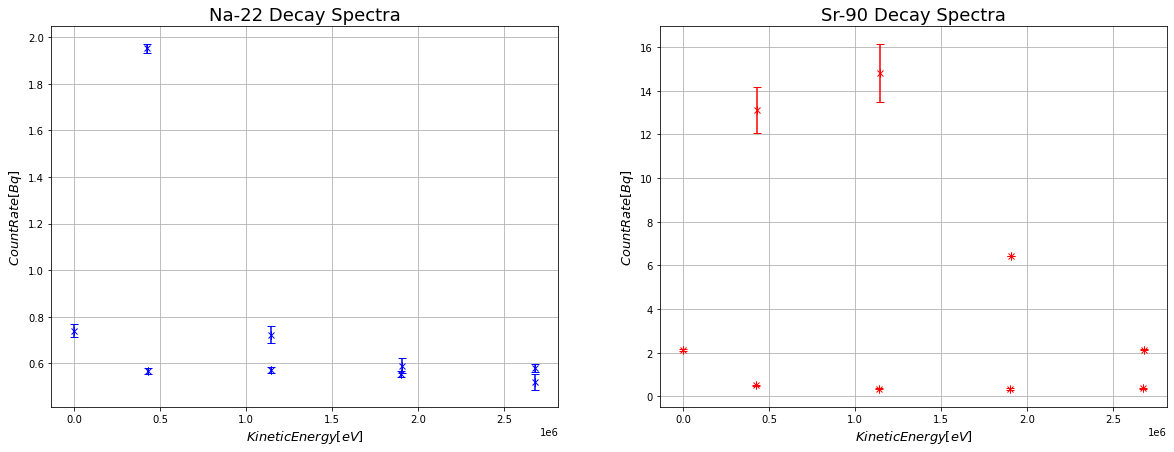

In [20]:
# Plot a graph of kinetic energy against count rate for both sources
# Setting up graphs
fig2, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)
axs[0].set_xlabel('$Kinetic Energy [eV]$', fontsize=13), axs[0].set_ylabel('$Count Rate [Bq]$', fontsize=13)
axs[1].set_xlabel('$Kinetic Energy [eV]$', fontsize=13), axs[1].set_ylabel('$Count Rate [Bq]$', fontsize=13)
axs[0].set_title('Na-22 Decay Spectra', fontsize = 18)
axs[1].set_title('Sr-90 Decay Spectra', fontsize = 18)
# Plotting data
#axs[0].scatter(Q_energy, na22_crate, color='red', marker='o', label='Data Points', zorder=3)
#axs[1].scatter(Q_energy, sr90_crate, color='blue', marker='x', label='Data Points', zorder=3)
axs[0].errorbar(Q_energy, na22_crate , yerr=na22_cerr, xerr=ke_err, color='blue', marker='x', capsize=4, linestyle='', zorder=2, label='Error')
axs[1].errorbar(Q_energy, sr90_crate , yerr=sr90_cerr, xerr=ke_err, color='red', marker='x', capsize=4, linestyle='', zorder=2, label='Error')

<ErrorbarContainer object of 3 artists>

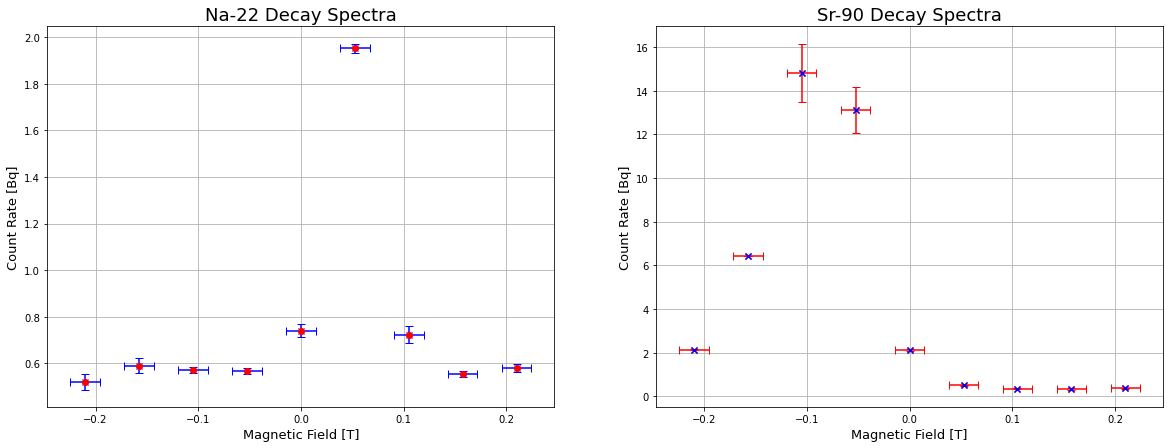

In [21]:
# Plot a graph of kinetic energy against count rate for both sources
# Setting up graphs
fig4, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)
axs[0].set_xlabel('Magnetic Field [T]', fontsize=13), axs[0].set_ylabel('Count Rate [Bq]', fontsize=13)
axs[1].set_xlabel('Magnetic Field [T]', fontsize=13), axs[1].set_ylabel('Count Rate [Bq]', fontsize=13)
axs[0].set_title('Na-22 Decay Spectra', fontsize = 18)
axs[1].set_title('Sr-90 Decay Spectra', fontsize = 18)
# Plotting data
axs[0].scatter(mag_fields, na22_crate, color='red', marker='o', label='Data Points', zorder=3)
axs[1].scatter(mag_fields, sr90_crate, color='blue', marker='x', label='Data Points', zorder=3)
axs[0].errorbar(mag_fields, na22_crate , yerr=na22_cerr, xerr=magfield_err, color='blue', marker='x', capsize=4, linestyle='', zorder=2, label='Error')
axs[1].errorbar(mag_fields, sr90_crate , yerr=sr90_cerr, xerr=magfield_err, color='red', marker='x', capsize=4, linestyle='', zorder=2, label='Error')

In [22]:
fig4.savefig('Mag_Decay_Spectra.png', dpi=300)

Points with the highest count rates have the magnetic field associated with them at that point converted into kinetic energy.

This is the 6th data point for Na-22 and 3rd for Sr-90.

In [23]:
# Finding KE of peak for Na-22 in eV
ke_na = kinetic_energy(9.11e-31, 50e-3, 3e8, 1.6e-19, mag_fields[5])
ke_na

425155.75907836756

In [24]:
# Error in KE of Na-22
ke_na_err = energy_err(mag_fields[5],1.6e-19,50e-3,3e8,9.11e-31,magf_err)
ke_na_err

5.791624421762624e-14

In [25]:
# Error in KE of Sr-90
ke_sr_err = energy_err(mag_fields[2],1.6e-19,50e-3,3e8,9.11e-31,magf_err)
ke_sr_err

6.577600003865694e-14

In [26]:
# Finding KE of peak for Sr-90 in eV
ke_sr = kinetic_energy(9.11e-31, 50e-3, 3e8, 1.6e-19, mag_fields[2])
ke_sr

1146167.3575485514

In [31]:
print(f'Kinetic energy of beta particles for Na-22 = {ke_na/1000:.2f} +/- {ke_na_err/1000} keV')
print(f'Kinetic energy of beta particles for Sr-90 = {ke_sr/1000000:.2f} MeV')

Kinetic energy of beta particles for Na-22 = 425.16 +/- 5.791624421762624e-17 keV
Kinetic energy of beta particles for Sr-90 = 1.15 MeV
